## Initial Modeling

In [1]:
import pandas as pd

In [53]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
df = pd.read_csv('Data_and_Cleaning/cleaned_df.csv')

In [3]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [7]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Feature Engineering

In [10]:
#total number of past dues
df['Total_PastDues'] = df['NumberOfTime30-59DaysPastDueNotWorse'] + df['NumberOfTime60-89DaysPastDueNotWorse'] + df['NumberOfTimes90DaysLate']

In [11]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0


In [13]:
#util % times age
#created feature

df['Util_by_Age'] = df['RevolvingUtilizationOfUnsecuredLines'] * df['age']
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0,19.287113
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0,3.009866
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0,13.188787
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0.000000


In [15]:
#DebtRatio * MI / number of lines
#debt per line

df['Debt_per_Line'] = df['DebtRatio'] * df['MonthlyIncome'] / df['NumberOfOpenCreditLinesAndLoans']
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0,19.287113,196.370815
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0,3.009866,118.193717
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0,13.188787,1000.320859
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0.000000,0.000000


In [18]:
df['NumberOfDependents'] + 1

0         3.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
120260    1.0
120261    1.0
120262    3.0
120263    1.0
120264    1.0
Name: NumberOfDependents, Length: 120265, dtype: float64

In [22]:
#debt level

df['DebtLevel'] = df['DebtRatio'] * df['MonthlyIncome']
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0,19.287113,196.370815,1374.595707
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0,3.009866,118.193717,472.774869
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0,13.188787,1000.320859,4001.283436
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0.000000,0.000000,0.000000


In [24]:
#DebtRatio * MI / (num of deps + 1) 
#Debt per individual

df['Debt_per_Individual'] = df['DebtRatio'] * df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016,2441.065672
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123,158.439061
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887,258.914887
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951,118.963951
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094,1584.975094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0,19.287113,196.370815,1374.595707,1374.595707
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0,3.009866,118.193717,472.774869,472.774869
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0,13.188787,1000.320859,4001.283436,1333.761145
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0.000000,0.000000,0.000000,0.000000


In [25]:
df.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                             0
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                        0
Total_PastDues                            0
Util_by_Age                               0
Debt_per_Line                           679
DebtLevel                                 0
Debt_per_Individual                       0
dtype: int64

In [28]:
#MI / (num of deps + 1)
#MI per individual

df['MonthlyIncome_per_Individual'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016,2441.065672,3040.000000
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123,158.439061,1300.000000
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887,258.914887,3042.000000
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951,118.963951,3300.000000
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094,1584.975094,63588.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0,19.287113,196.370815,1374.595707,1374.595707,3400.000000
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0,3.009866,118.193717,472.774869,472.774869,2100.000000
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0,13.188787,1000.320859,4001.283436,1333.761145,1861.333333
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0.000000,0.000000,0.000000,0.000000,5716.000000


In [29]:
df.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                             0
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                        0
Total_PastDues                            0
Util_by_Age                               0
Debt_per_Line                           679
DebtLevel                                 0
Debt_per_Individual                       0
MonthlyIncome_per_Individual              0
dtype: int64

In [30]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016,2441.065672,3040.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123,158.439061,1300.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887,258.914887,3042.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951,118.963951,3300.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094,1584.975094,63588.0


In [34]:
df[df.isna().any(axis=1)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
330,0,1.0,60,0,0.0,4200.0,0,0,0,0,0.0,0,59.999994,NaN,0.0,0.0,4200.000000
746,0,1.0,34,1,0.0,5400.0,0,1,0,0,0.0,2,33.999997,NaN,0.0,0.0,5400.000000
957,0,1.0,82,0,0.0,1400.0,0,0,0,0,0.0,0,81.999992,NaN,0.0,0.0,1400.000000
1402,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0,294,26.999997,NaN,0.0,0.0,2700.000000
1481,0,1.0,31,0,0.0,1200.0,0,0,0,0,0.0,0,30.999997,NaN,0.0,0.0,1200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119378,0,1.0,42,0,0.0,2400.0,0,0,0,0,0.0,0,41.999996,NaN,0.0,0.0,2400.000000
119603,0,1.0,82,0,0.0,439.0,0,0,0,0,0.0,0,81.999992,NaN,0.0,0.0,439.000000
119663,0,1.0,26,98,0.0,2000.0,0,98,0,98,0.0,294,25.999997,NaN,0.0,0.0,2000.000000
119861,1,1.0,27,0,0.0,3258.0,0,0,0,0,0.0,0,26.999997,NaN,0.0,0.0,3258.000000


In [37]:
df = df.dropna()

In [38]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016,2441.065672,3040.000000
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123,158.439061,1300.000000
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887,258.914887,3042.000000
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951,118.963951,3300.000000
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094,1584.975094,63588.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0,19.287113,196.370815,1374.595707,1374.595707,3400.000000
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0,3.009866,118.193717,472.774869,472.774869,2100.000000
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0,13.188787,1000.320859,4001.283436,1333.761145,1861.333333
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0.000000,0.000000,0.000000,0.000000,5716.000000


In [39]:
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Total_PastDues                          0
Util_by_Age                             0
Debt_per_Line                           0
DebtLevel                               0
Debt_per_Individual                     0
MonthlyIncome_per_Individual            0
dtype: int64

## Modeling

In [41]:
df['SeriousDlqin2yrs']

0         1
1         0
2         0
3         0
4         0
         ..
120260    0
120261    0
120262    0
120263    0
120264    0
Name: SeriousDlqin2yrs, Length: 119586, dtype: int64

In [42]:
df['SeriousDlqin2yrs'].value_counts()

0    111410
1      8176
Name: SeriousDlqin2yrs, dtype: int64

In [44]:
y = df['SeriousDlqin2yrs']

In [51]:
X = df.drop('SeriousDlqin2yrs', axis=1)

In [52]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016,2441.065672,3040.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123,158.439061,1300.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887,258.914887,3042.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951,118.963951,3300.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094,1584.975094,63588.0


In [56]:
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Total_PastDues                          0
Util_by_Age                             0
Debt_per_Line                           0
DebtLevel                               0
Debt_per_Individual                     0
MonthlyIncome_per_Individual            0
dtype: int64

In [58]:
df = df.replace([np.inf, -np.inf], np.nan)
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016,2441.065672,3040.000000
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123,158.439061,1300.000000
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887,258.914887,3042.000000
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951,118.963951,3300.000000
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094,1584.975094,63588.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0,19.287113,196.370815,1374.595707,1374.595707,3400.000000
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0,3.009866,118.193717,472.774869,472.774869,2100.000000
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0,13.188787,1000.320859,4001.283436,1333.761145,1861.333333
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0.000000,0.000000,0.000000,0.000000,5716.000000


In [60]:
df.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                             0
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                        0
Total_PastDues                            0
Util_by_Age                               0
Debt_per_Line                           477
DebtLevel                                 0
Debt_per_Individual                       0
MonthlyIncome_per_Individual              0
dtype: int64

In [62]:
df = df.dropna()
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Total_PastDues,Util_by_Age,Debt_per_Line,DebtLevel,Debt_per_Individual,MonthlyIncome_per_Individual
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,2,34.475697,563.322847,7323.197016,2441.065672,3040.000000
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,38.286041,79.219531,316.878123,158.439061,1300.000000
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,2,25.010845,129.457443,258.914887,258.914887,3042.000000
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,7.014293,23.792790,118.963951,118.963951,3300.000000
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1,44.454731,226.425013,1584.975094,1584.975094,63588.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120260,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0,0,19.287113,196.370815,1374.595707,1374.595707,3400.000000
120261,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,0,3.009866,118.193717,472.774869,472.774869,2100.000000
120262,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,0,13.188787,1000.320859,4001.283436,1333.761145,1861.333333
120263,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,0,0.000000,0.000000,0.000000,0.000000,5716.000000


In [65]:
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Total_PastDues                          0
Util_by_Age                             0
Debt_per_Line                           0
DebtLevel                               0
Debt_per_Individual                     0
MonthlyIncome_per_Individual            0
dtype: int64

In [67]:
df = df.replace([np.inf, -np.inf], np.nan)
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Total_PastDues                          0
Util_by_Age                             0
Debt_per_Line                           0
DebtLevel                               0
Debt_per_Individual                     0
MonthlyIncome_per_Individual            0
dtype: int64

In [72]:
y = df['SeriousDlqin2yrs']
X = df.drop('SeriousDlqin2yrs', axis=1)

In [73]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

In [78]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', max_iter=1150)

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=1150, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
#Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [80]:
y_hat_test

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    83561
1     5770
Name: SeriousDlqin2yrs, dtype: int64
------------------------------------
0    0.935409
1    0.064591
Name: SeriousDlqin2yrs, dtype: float64


In [82]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))

0    27864
1     1914
Name: SeriousDlqin2yrs, dtype: int64
------------------------------------
0    0.935724
1    0.064276
Name: SeriousDlqin2yrs, dtype: float64


Test AUC: 0.5726388297826764


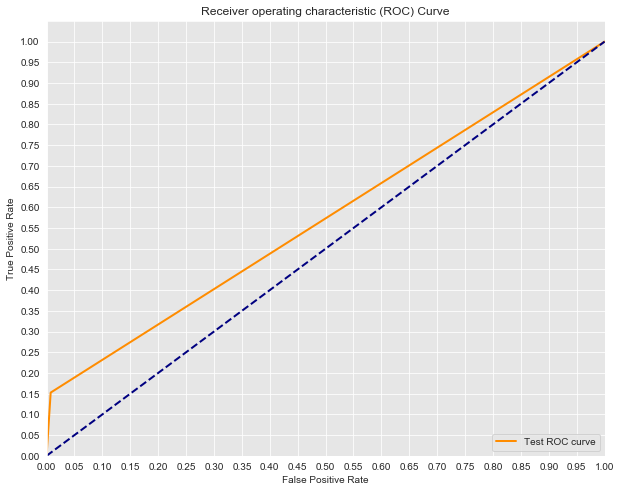

In [83]:
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)

print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [84]:
from sklearn.metrics import confusion_matrix

test_predictions = (y_hat_test >= 0.5).astype('int')

cnf_matrix = confusion_matrix(test_predictions, y_test)

print(cnf_matrix)

[[27556  1710]
 [  204   308]]


In [85]:
##this cell needs to be adjusted to match the parameters that performed the best, and all cells going forward

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='newton-cg', )
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

Train AUC: 0.7786501597420219
Test AUC: 0.7690392822665177


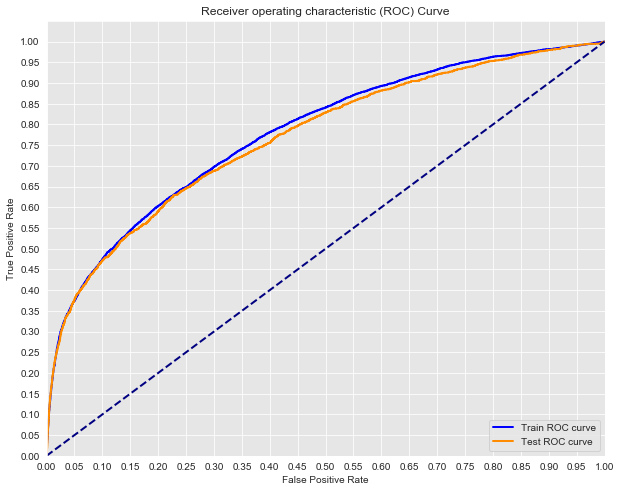

In [86]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
##this cell

logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear')
logregi.fit(X_train, y_train)

Custom Model Test AUC: 0.5726388297826764
Custome Model Train AUC: 0.5698936999053532
Scikit-learn Model 1 Test AUC: 0.7690392822665177
Scikit-learn Model 1 Train AUC: 0.7786501597420219


NameError: name 'logregi' is not defined

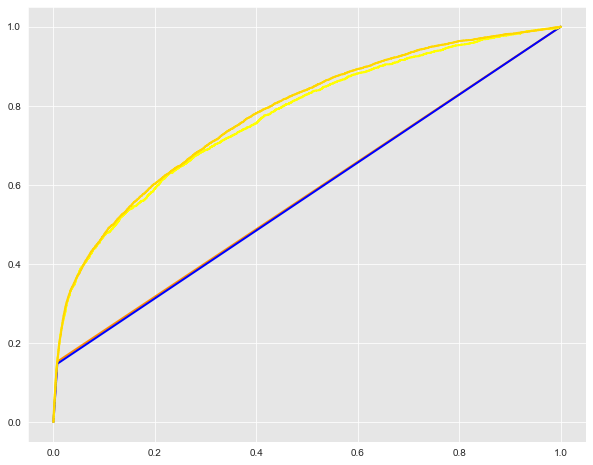

In [87]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
fig, axes = plt.subplots(4,2, figsize=(15, 15))
for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i, j]
    # Fit a model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n), solver='liblinear')
    logreg.fit(X_train, y_train)
    
    y_test_score = logreg.decision_function(X_test)
    y_train_score = logreg.decision_function(X_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    test_auc = auc(test_fpr, test_tpr)
    train_auc = auc(train_fpr, train_tpr)
    auc_diff = round(train_auc - test_auc, 4)

#     print('Test AUC with C=1.5^{}: {}'.format(n*2, auc(test_fpr, test_tpr)))
#     print('Train AUCwith C=1.5^{}: {}'.format(n*2, auc(train_fpr, train_tpr)))
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')
    ax.plot(train_fpr, train_tpr, color='blue',
             lw=lw, label='Train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff))

In [ ]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_test, y_hat_test)

In [ ]:

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show()

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show()

In [ ]:
# Plot a normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', class_weight='balanced')

# Fit the model
logreg.fit(X_train, y_train)

In [ ]:

# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear', class_weight='balanced')

# Fit the model
logreg.fit(X_train, y_train)

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='newton-cg', )
logreg.fit(X_train, y_train)

In [ ]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='sag')

# Fit the model
logreg.fit(X_train, y_train)

In [ ]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='saga')

# Fit the model
logreg.fit(X_train, y_train)